In [1]:
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score

In [2]:
numOfFoldsPerTrial = 10

In [37]:
def evaluatePerformance(numTrials=1):
    filename = 'data/SPECTF.dat'
    data = np.loadtxt(filename, delimiter=',')
    X = data[:, 1:]                 #(267, 44)
    y = np.array([data[:, 0]]).T     #(267, 1)
    n,d = X.shape 


    # Taọ danh sách để lưu dữ liệu accuracy
    treeAccuracies = []
    stumpAccuracies = []        #a 1-level decision tree
    dt3Accuracies = []           #a 3-level decision tree

    # perform 100 trials
    for x in range(0, numTrials):
#         print("Trial: ",x)
        #Xáo trộn tập dữ liệu
        idx = np.arange(n)
        np.random.seed(15)
        np.random.shuffle(idx)

        X = X[idx]          #(267, 44)
        y = y[idx]          #(267, 1)

        # split the data randomly into 10 folds
        folds = []                                             #Chia tập dữ liệu thành 10 folds
        intervalDivider = int(len(X)/numOfFoldsPerTrial)       #26: Số điểm dữ liệu trong 1 fold
        for fold in range(0, numOfFoldsPerTrial):          #Duyệt từng Fold
                                                                       #VD fold = 0
            # Tạo tập test mới là fold cuối cùng
            Xtest = X[fold * intervalDivider:(fold + 1) * intervalDivider,:]        #Xtest = X[0:26, :]
            ytest = y[fold * intervalDivider:(fold + 1) * intervalDivider,:]  
            
#             print(Xtest[0])
            #Tạo tập train 
            Xtrain = X[:(fold * intervalDivider),:]                                 #Xtrain = 
            ytrain = y[:(fold * intervalDivider),:]
            Xtrain = Xtrain.tolist()
            ytrain = ytrain.tolist()
            # complete the training data set so that it contains all
            # data except for the current test fold
            for dataRow in range((fold + 1) * intervalDivider, len(X)):
                Xtrain.append(X[dataRow])
                ytrain.append(y[dataRow])
            
            #Xtrain là mảng chứa 241 phần tử, mỗi phần tử có số phần tử con là 44
            #ytrain là mảng chứa 241 phần tử, mỗi phần tử có số phần tử con là 1
            
            #tree.DecisionTreeClassifier(): mặc định mở rộng cây cho đến khi tất cả các lá chứa ít hơn 2 mẫu
            
            # train với decision tree
            clf = tree.DecisionTreeClassifier()
            clf = clf.fit(Xtrain,ytrain)

            # train với 1-level decision tree: độ sâu là 1
            oneLevel = tree.DecisionTreeClassifier(max_depth=1)
            oneLevel = oneLevel.fit(Xtrain,ytrain)

            # train với 3-level decision tree: độ sâu của cây là 3
            threeLevel = tree.DecisionTreeClassifier(max_depth=3)
            threeLevel = threeLevel.fit(Xtrain,ytrain)

            # Dự đoán output trên tập test
            y_pred_tree = clf.predict(Xtest)
            y_pred_stump = oneLevel.predict(Xtest)
            y_pred_dt3 = threeLevel.predict(Xtest)

            # Tính độ chính xác của model và lưu lại
            treeAccuracies.append(accuracy_score(ytest, y_pred_tree))
            stumpAccuracies.append(accuracy_score(ytest, y_pred_stump))
            dt3Accuracies.append(accuracy_score(ytest, y_pred_dt3)) 
            
            
    # Update these statistics based on the results of your experiment
    meanDecisionTreeAccuracy = np.mean(treeAccuracies)         #len(treeAccuracies) = 1000
    stddevDecisionTreeAccuracy = np.std(treeAccuracies)
    meanDecisionStumpAccuracy = np.mean(stumpAccuracies)       #len(stumpAccuracies) = 1000
    stddevDecisionStumpAccuracy = np.std(stumpAccuracies)
    meanDT3Accuracy = np.mean(dt3Accuracies)                   #len(dt3Accuracies) = 1000
    stddevDT3Accuracy = np.std(dt3Accuracies)

    # make certain that the return value matches the API specification
    stats = np.zeros((3,2))
    stats[0,0] = meanDecisionTreeAccuracy
    stats[0,1] = stddevDecisionTreeAccuracy
    stats[1,0] = meanDecisionStumpAccuracy
    stats[1,1] = stddevDecisionStumpAccuracy
    stats[2,0] = meanDT3Accuracy
    stats[2,1] = stddevDT3Accuracy
    return stats, treeAccuracies, stumpAccuracies, dt3Accuracies

In [38]:
stats, treeAccuracies, stumpAccuracies, dt3Accuracies = evaluatePerformance()
print("Decision Tree Accuracy = ", stats[0,0], " (", stats[0,1], ")")
print("Decision Stump Accuracy = ", stats[1,0], " (", stats[1,1], ")")
print("3-level Decision Tree = ", stats[2,0], " (", stats[2,1], ")")

Decision Tree Accuracy =  0.7576923076923077  ( 0.11020422139918773 )
Decision Stump Accuracy =  0.7884615384615385  ( 0.08812645567222771 )
3-level Decision Tree =  0.7884615384615385  ( 0.11047235858726978 )


In [10]:
print(len(treeAccuracies))
print(len(stumpAccuracies))
print(len(dt3Accuracies))

10
10
10


In [43]:
import matplotlib.pyplot as plt

In [44]:
numberOfTrainingExamples = [i*26 for i in range(numOfFoldsPerTrial)]

In [45]:
numberOfTrainingExamples

[0, 26, 52, 78, 104, 130, 156, 182, 208, 234]

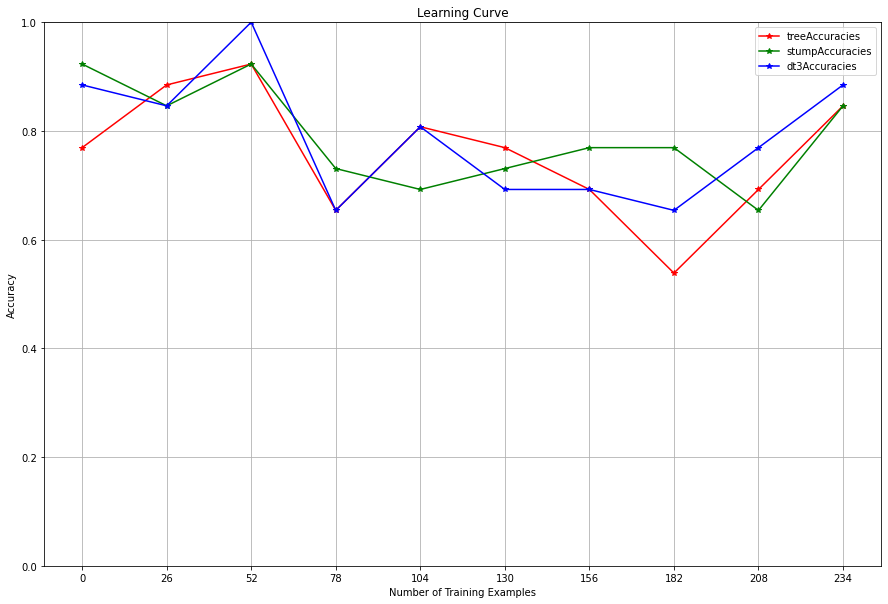

In [48]:
plt.figure(figsize=(15,10))
plt.plot(numberOfTraining, treeAccuracies, "r*-", label="treeAccuracies")
plt.plot(numberOfTraining, stumpAccuracies, "g*-", label="stumpAccuracies")
plt.plot(numberOfTraining, dt3Accuracies, "b*-", label="dt3Accuracies")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.xticks(numberOfTrainingExamples)
plt.ylim(0,1)
plt.legend(loc="best")
plt.grid()
plt.show()